In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle, islice
from collections import Counter
import pylab
import seaborn as sns
import datetime
import re as re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# ** PLEASE NOTE **
# For this notebook, you need to up load the .csv file produced by the previous notebook

df = pd.read_csv('C:/Users/tooby/Documents/Studies/3803ICT Big Data Analysis/ass 1/new_df_output.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tooby\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df.shape

(300735, 16)

In [3]:
df.isnull().sum()

Unnamed: 0                0
Id                        0
Title                     0
Company                   0
Date                      0
Location              66937
Area                 175390
Classification            0
SubClassification         0
Requirement               0
FullDescription           0
LowestSalary              0
HighestSalary             0
JobType                   0
TitleCategory             0
AverageSalary             0
dtype: int64

In [4]:
# Fill in any missing Location and Area with Unknown
df["Area"].fillna("Unknown", inplace = True)
df["Location"].fillna("Unknown", inplace = True)
df = df.drop(['Unnamed: 0'], axis = 1)
df.to_csv('output.csv')
df.isnull().sum()

Id                   0
Title                0
Company              0
Date                 0
Location             0
Area                 0
Classification       0
SubClassification    0
Requirement          0
FullDescription      0
LowestSalary         0
HighestSalary        0
JobType              0
TitleCategory        0
AverageSalary        0
dtype: int64

In [5]:
df.shape

(300735, 15)

In [6]:
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,TitleCategory,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers Pride Themselves...,Our Casual Stock Replenishers Pride Themselves...,15.0,30,Casual/Vacation,Casual Stock Replenisher,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,Unknown,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers Pride Themselves...,Our Casual Stock Replenishers Pride Themselves...,15.0,30,Casual/Vacation,Casual Stock Replenisher,15.0
2,37404356,Retail Sales Superstars And Stylists Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,Brand New Flagship Store Opening - Sunshine Plaza,Brand New Flagship Store Opening - Sunshine Plaza,15.0,30,Casual/Vacation,Retail Sales Superstars And Stylists Wanted - ...,15.0
3,37404355,Casual Café All-Rounder In Semaphore,Jora Local,2018-10-07,Adelaide,Unknown,Hospitality & Tourism,Waiting Staff,A Cafe/Restaurant In Semaphore Is Seeking A Ca...,A Cafe/Restaurant In Semaphore Is Seeking A Ca...,15.0,30,Casual/Vacation,Casual Café All-Rounder In Semaphore,15.0
4,37404350,Casual Café All-Rounder In Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A Cafe In Woolloongabba Is Seeking A Casual Ca...,A Cafe In Woolloongabba Is Seeking A Casual Ca...,15.0,30,Casual/Vacation,Casual Café All-Rounder In Woolloongabba,15.0


In [7]:
# Colour list for most of the bar graphs
my_colours = list(islice(cycle(['navy', 'mediumblue', 'royalblue', 'cornflowerblue', 'skyblue', 'turquoise',
                               'aquamarine', 'mediumspringgreen', 'lime', 'greenyellow']), None, len(df)))

In [8]:
# Just show locations that are known
for_plot = df.loc[df['Location'] != 'Unknown', 'Location'].value_counts()
print(for_plot)

Sydney                                  75205
Melbourne                               56606
Brisbane                                26574
Perth                                   16963
Adelaide                                 8236
                                        ...  
Yorke Peninsula & Clare Valley             95
Tumut, Snowy & Monaro                      84
Somerset & Lockyer                         65
Fleurieu Peninsula & Kangaroo Island       64
Central & South East TAS                   57
Name: Location, Length: 65, dtype: int64


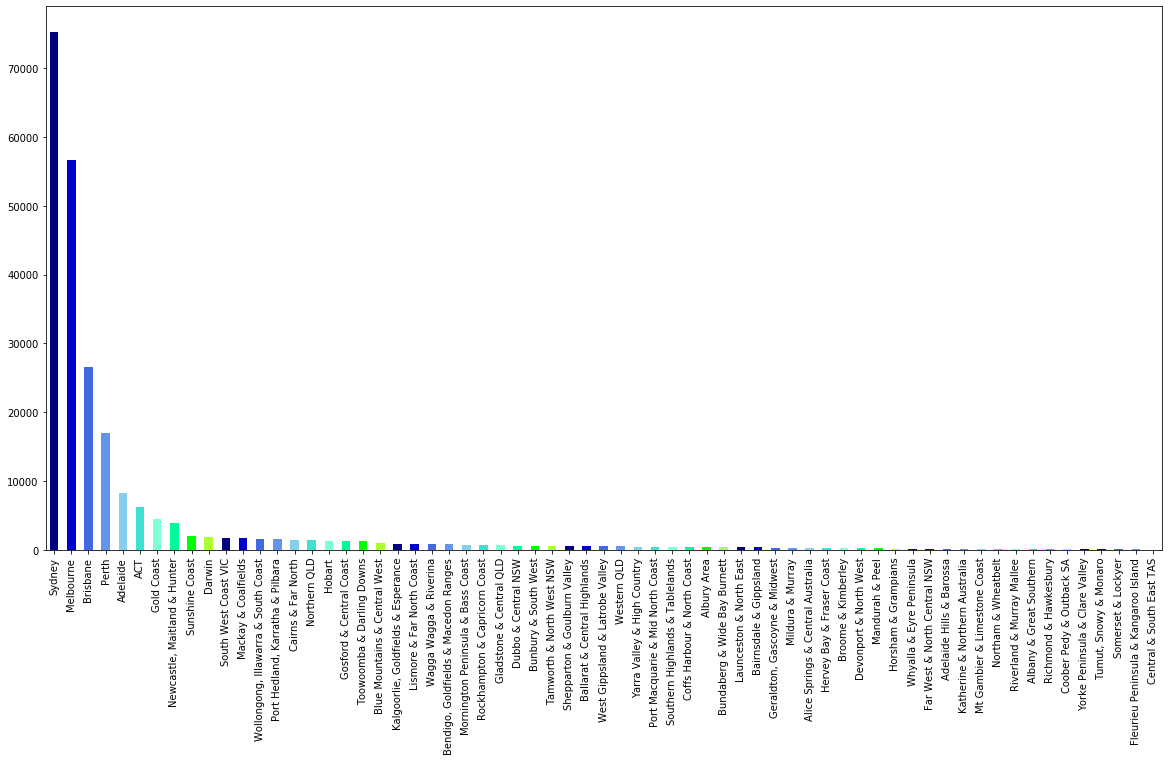

In [9]:
for_plot.plot.bar(figsize=(20,10), color=my_colours)

In [10]:
# Show classification by location = sydney
for_plot = df.loc[df['Location'] == 'Sydney', 'Classification'].value_counts()
print(for_plot)

Information & Communication Technology    11756
Administration & Office Support            4948
Trades & Services                          4947
Accounting                                 4772
Hospitality & Tourism                      4467
Sales                                      4434
Manufacturing, Transport & Logistics       4415
Healthcare & Medical                       3982
Retail & Consumer Products                 3767
Construction                               3584
Banking & Financial Services               2723
Education & Training                       2600
Engineering                                2349
Marketing & Communications                 2163
Human Resources & Recruitment              2065
Government & Defence                       2007
Call Centre & Customer Service             1775
Legal                                      1742
Real Estate & Property                     1603
Community Services & Development            969
Design & Architecture                   

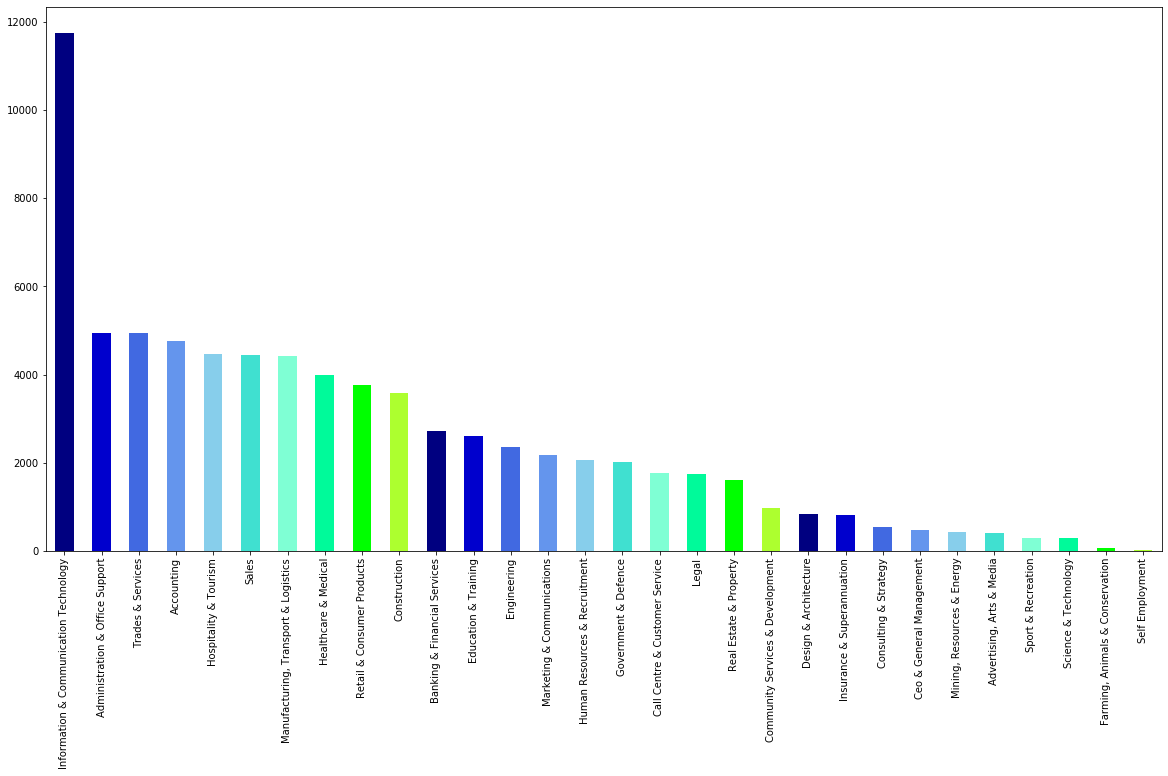

In [11]:
for_plot.plot.bar(figsize=(20,10), color=my_colours)

In [12]:
# Show classification by location = melbourne
for_plot = df.loc[df['Location'] == 'Melbourne', 'Classification'].value_counts()
print(for_plot)

Information & Communication Technology    7154
Trades & Services                         4502
Hospitality & Tourism                     4398
Manufacturing, Transport & Logistics      4361
Healthcare & Medical                      4189
Administration & Office Support           3475
Accounting                                2859
Retail & Consumer Products                2824
Education & Training                      2757
Sales                                     2718
Construction                              2670
Engineering                               1880
Government & Defence                      1642
Legal                                     1415
Human Resources & Recruitment             1285
Call Centre & Customer Service            1235
Marketing & Communications                1232
Real Estate & Property                    1220
Community Services & Development           945
Banking & Financial Services               895
Design & Architecture                      831
Mining, Resou

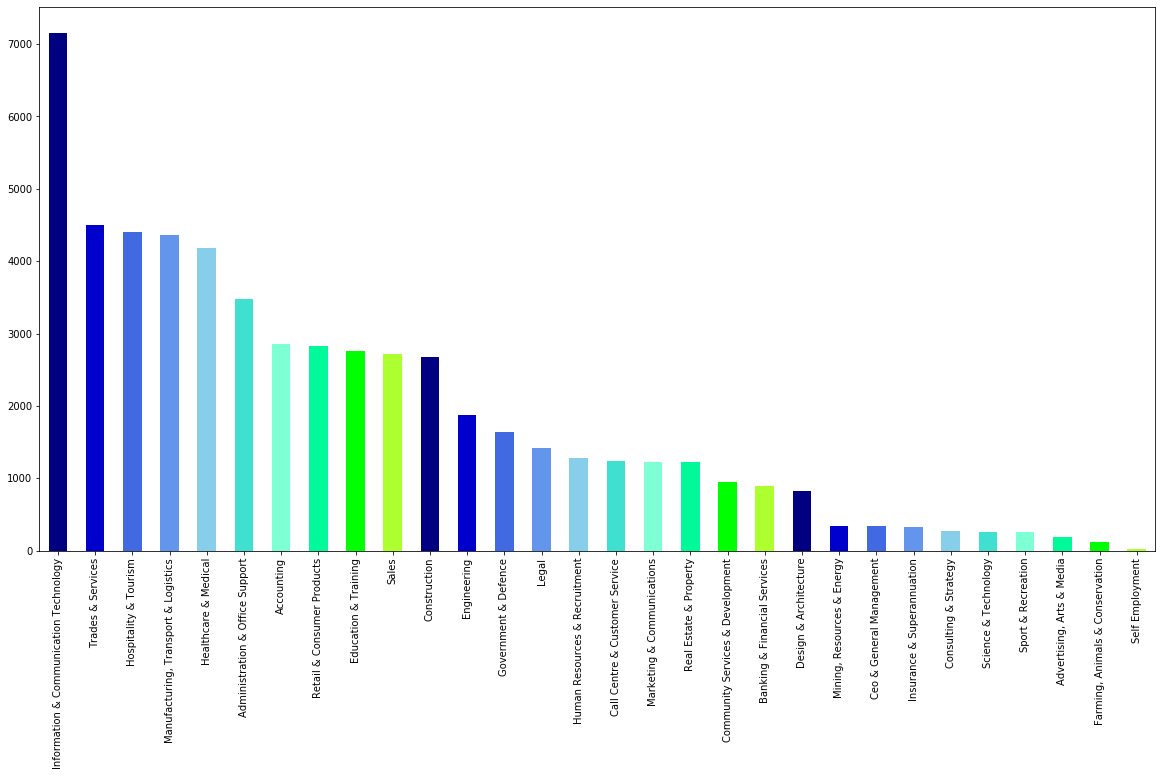

In [13]:
for_plot.plot.bar(figsize=(20,10), color=my_colours)

In [14]:
# Show classificationi by location = brisbane
for_plot = df.loc[df['Location'] == 'Brisbane', 'Classification'].value_counts()
print(for_plot)

Information & Communication Technology    3379
Trades & Services                         2453
Healthcare & Medical                      2240
Manufacturing, Transport & Logistics      2158
Administration & Office Support           1672
Hospitality & Tourism                     1498
Retail & Consumer Products                1427
Accounting                                1302
Education & Training                      1252
Sales                                     1180
Construction                              1051
Engineering                               1031
Government & Defence                       907
Legal                                      696
Mining, Resources & Energy                 570
Human Resources & Recruitment              537
Community Services & Development           506
Call Centre & Customer Service             493
Real Estate & Property                     454
Marketing & Communications                 417
Banking & Financial Services               376
Ceo & General

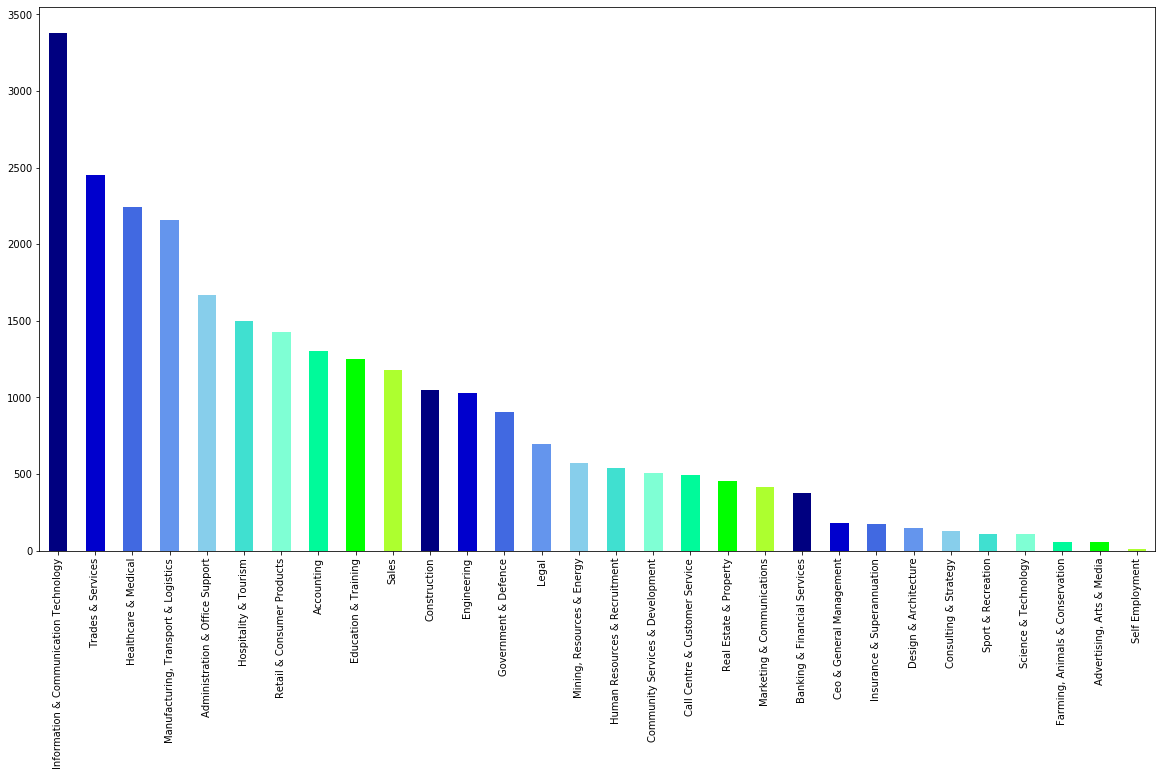

In [15]:
for_plot.plot.bar(figsize=(20,10), color=my_colours)

In [16]:
# change salary types to ints
df['LowestSalary'] = df['LowestSalary'].astype(int)
df['AverageSalary'] = df['AverageSalary'].astype(int)

In [17]:
df['SalaryRange'] = df['LowestSalary'].astype(str) + ',000 to ' + df['HighestSalary'].astype(str) + ',000'
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,TitleCategory,AverageSalary,SalaryRange
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers Pride Themselves...,Our Casual Stock Replenishers Pride Themselves...,15,30,Casual/Vacation,Casual Stock Replenisher,15,"15,000 to 30,000"
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,Unknown,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers Pride Themselves...,Our Casual Stock Replenishers Pride Themselves...,15,30,Casual/Vacation,Casual Stock Replenisher,15,"15,000 to 30,000"
2,37404356,Retail Sales Superstars And Stylists Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,Brand New Flagship Store Opening - Sunshine Plaza,Brand New Flagship Store Opening - Sunshine Plaza,15,30,Casual/Vacation,Retail Sales Superstars And Stylists Wanted - ...,15,"15,000 to 30,000"
3,37404355,Casual Café All-Rounder In Semaphore,Jora Local,2018-10-07,Adelaide,Unknown,Hospitality & Tourism,Waiting Staff,A Cafe/Restaurant In Semaphore Is Seeking A Ca...,A Cafe/Restaurant In Semaphore Is Seeking A Ca...,15,30,Casual/Vacation,Casual Café All-Rounder In Semaphore,15,"15,000 to 30,000"
4,37404350,Casual Café All-Rounder In Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A Cafe In Woolloongabba Is Seeking A Casual Ca...,A Cafe In Woolloongabba Is Seeking A Casual Ca...,15,30,Casual/Vacation,Casual Café All-Rounder In Woolloongabba,15,"15,000 to 30,000"


15,000 to 30,000      14336
30,000 to 40,000       4383
40,000 to 50,000       6412
50,000 to 60,000       6116
60,000 to 70,000       6570
70,000 to 80,000       6596
80,000 to 100,000      5216
100,000 to 120,000     6977
120,000 to 150,000     7220
150,000 to 200,000     7807
200,000 to 999,000     3572
Name: SalaryRange, dtype: int64

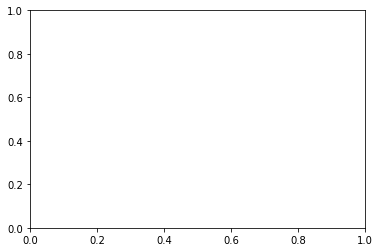

In [18]:
# colours for the pie graphs
pie_colours = ['navy', 'mediumblue', 'royalblue', 'cornflowerblue', 'skyblue', 'turquoise', 'mediumspringgreen',
               'lime', 'greenyellow', 'yellow', 'gold']

explode = (0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10)

# Sorter to ensure the salary ranges are in the right order ofr a mixed graph
sorter = ['15,000 to 30,000', '30,000 to 40,000', '40,000 to 50,000', '50,000 to 60,000', '60,000 to 70,000', 
          '70,000 to 80,000', '80,000 to 100,000', '100,000 to 120,000', '120,000 to 150,000', '150,000 to 200,000',   
          '200,000 to 999,000']

axes = plt.subplots()
for_plot = df.loc[df['Location'] == 'Sydney', 'SalaryRange'].value_counts()
for_plot = for_plot.reindex(sorter)
for_plot

Text(0, 0.5, '')

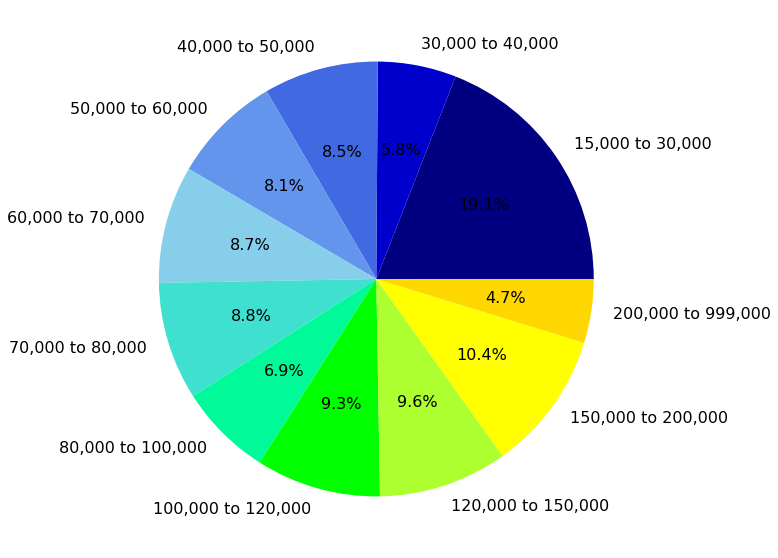

In [19]:
# plot for sydney salary ranges
for_plot.plot.pie(title = '', figsize=(10,10), colors = pie_colours, fontsize = 16, autopct='%1.1f%%')

pylab.ylabel('')

Text(0, 0.5, '')

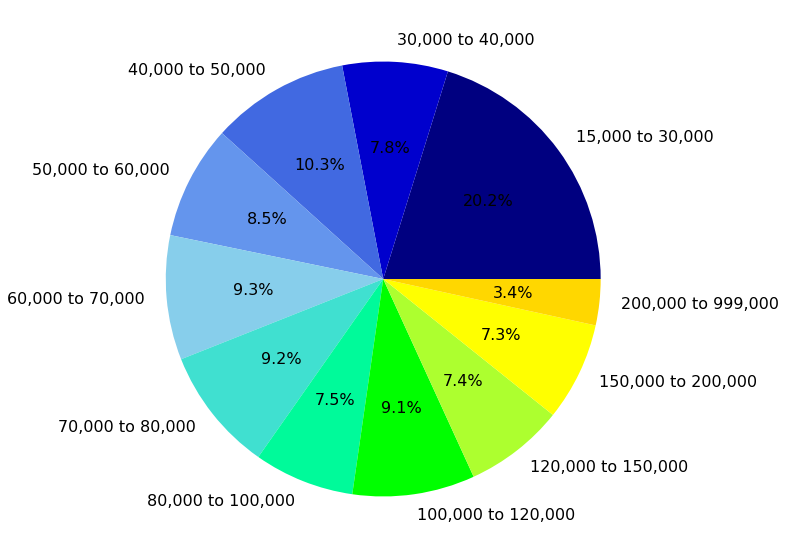

In [20]:
# plot for melbourne salary ranges
for_plot = df.loc[df['Location'] == 'Melbourne', 'SalaryRange'].value_counts()
for_plot = for_plot.reindex(sorter)
for_plot.plot.pie(title = '', figsize=(10,10), colors = pie_colours, fontsize = 16, autopct='%1.1f%%')
pylab.ylabel('')

Text(0, 0.5, '')

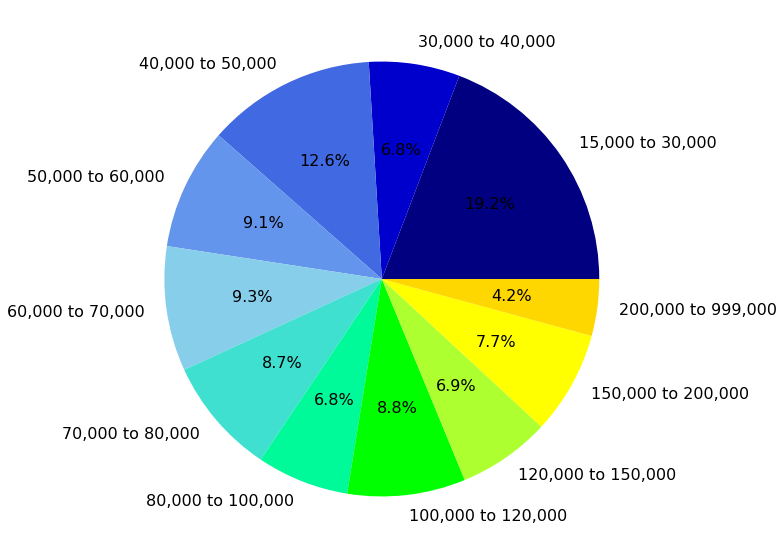

In [21]:
# plot for brisbane salary ranges
for_plot = df.loc[df['Location'] == 'Brisbane', 'SalaryRange'].value_counts()
for_plot = for_plot.reindex(sorter)
for_plot.plot.pie(title = '', figsize=(10,10), colors = pie_colours, fontsize = 16, autopct='%1.1f%%')
pylab.ylabel('')

In [22]:
sydney = df.loc[df['Location'] == 'Sydney', 'SalaryRange'].value_counts()
for_plot = for_plot.reindex(sorter)
sydney_df = pd.DataFrame(sydney)
sydney_df = sydney_df.rename_axis('SalaryRange')
sydney_df.columns = ['Count']
print(sydney_df)

                    Count
SalaryRange              
15,000 to 30,000    14336
150,000 to 200,000   7807
120,000 to 150,000   7220
100,000 to 120,000   6977
70,000 to 80,000     6596
60,000 to 70,000     6570
40,000 to 50,000     6412
50,000 to 60,000     6116
80,000 to 100,000    5216
30,000 to 40,000     4383
200,000 to 999,000   3572


In [23]:
melbourne = df.loc[df['Location'] == 'Melbourne', 'SalaryRange'].value_counts()
for_plot = for_plot.reindex(sorter)
melbourne_df = pd.DataFrame(melbourne)
melbourne_df = melbourne_df.rename_axis('SalaryRange')
melbourne_df.columns = ['Count']
print(melbourne_df)

                    Count
SalaryRange              
15,000 to 30,000    11430
40,000 to 50,000     5812
60,000 to 70,000     5237
70,000 to 80,000     5234
100,000 to 120,000   5151
50,000 to 60,000     4794
30,000 to 40,000     4435
80,000 to 100,000    4226
120,000 to 150,000   4203
150,000 to 200,000   4145
200,000 to 999,000   1939


In [24]:
brisbane = df.loc[df['Location'] == 'Brisbane', 'SalaryRange'].value_counts()
for_plot = for_plot.reindex(sorter)
brisbane_df = pd.DataFrame(brisbane)
brisbane_df = brisbane_df.rename_axis('SalaryRange')
brisbane_df.columns = ['Count']
print(brisbane_df)

                    Count
SalaryRange              
15,000 to 30,000     5103
40,000 to 50,000     3336
60,000 to 70,000     2466
50,000 to 60,000     2410
100,000 to 120,000   2333
70,000 to 80,000     2323
150,000 to 200,000   2037
120,000 to 150,000   1829
80,000 to 100,000    1820
30,000 to 40,000     1795
200,000 to 999,000   1122


In [25]:
# info for combined salary ranges
for_plot_df = pd.merge(pd.merge(sydney_df,melbourne_df, on = 'SalaryRange',how='left'),brisbane_df,on='SalaryRange',how='left')
for_plot_df = for_plot_df.reindex(sorter)
for_plot_df.columns = ['Sydney', 'Melbourne', 'Brisbane']
print(for_plot_df)

                    Sydney  Melbourne  Brisbane
SalaryRange                                    
15,000 to 30,000     14336      11430      5103
30,000 to 40,000      4383       4435      1795
40,000 to 50,000      6412       5812      3336
50,000 to 60,000      6116       4794      2410
60,000 to 70,000      6570       5237      2466
70,000 to 80,000      6596       5234      2323
80,000 to 100,000     5216       4226      1820
100,000 to 120,000    6977       5151      2333
120,000 to 150,000    7220       4203      1829
150,000 to 200,000    7807       4145      2037
200,000 to 999,000    3572       1939      1122


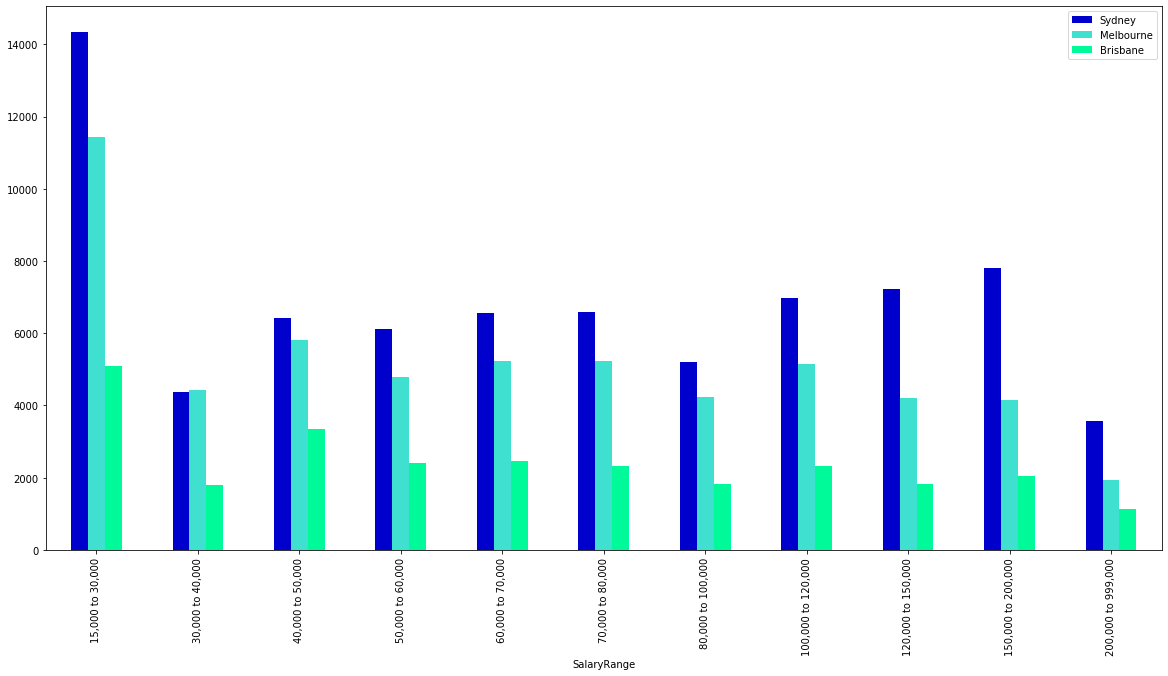

In [26]:
# plot for combined salary ranges
three_colours = ['mediumblue', 'turquoise', 'mediumspringgreen']
for_plot_df.plot.bar(figsize=(20,10), color=three_colours)

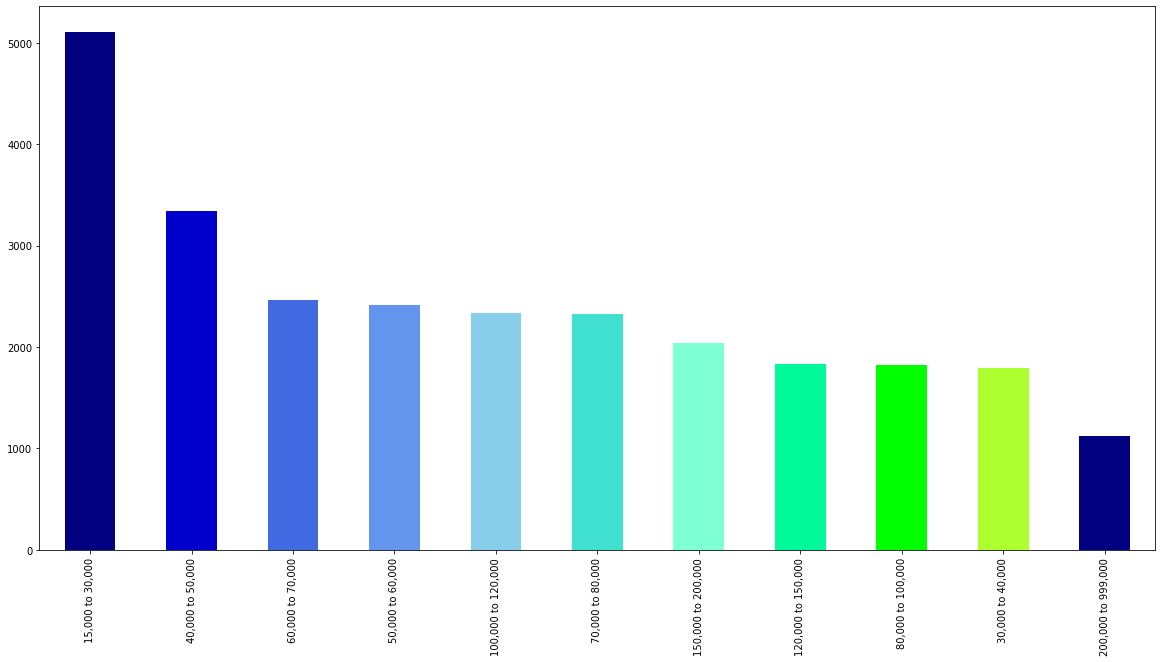

In [27]:
for_plot = df.loc[df['Location'] == 'Brisbane', 'SalaryRange'].value_counts()
for_plot.plot.bar(figsize=(20,10), color=my_colours)

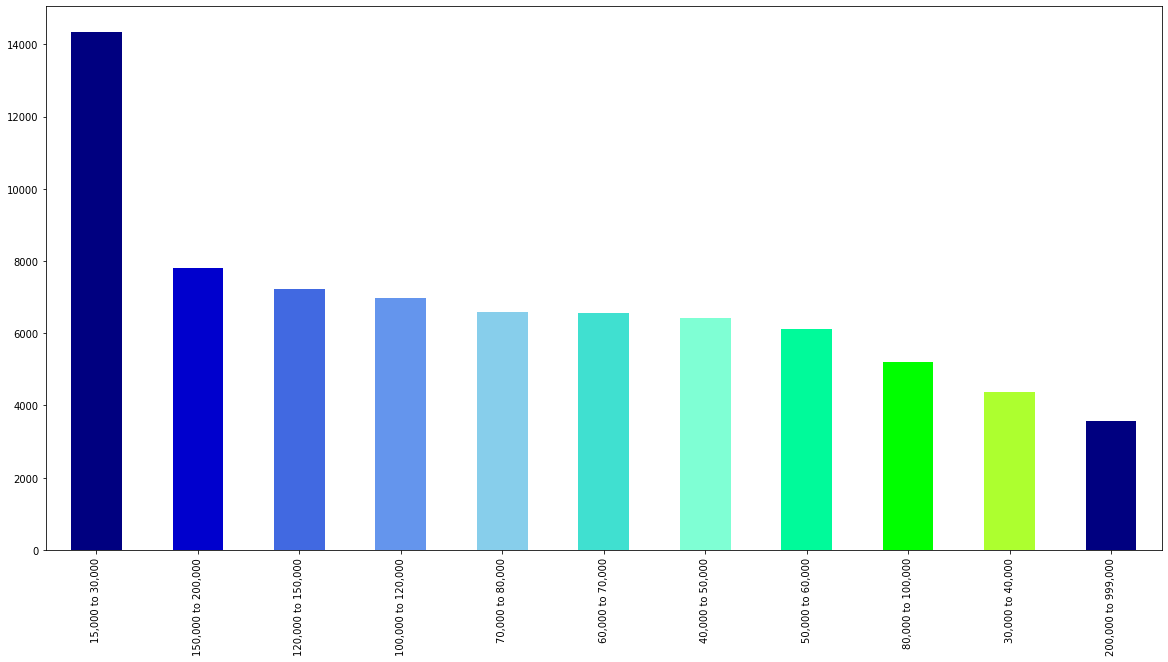

In [28]:
for_plot = df.loc[df['Location'] == 'Sydney', 'SalaryRange'].value_counts()
for_plot.plot.bar(figsize=(20,10), color=my_colours)

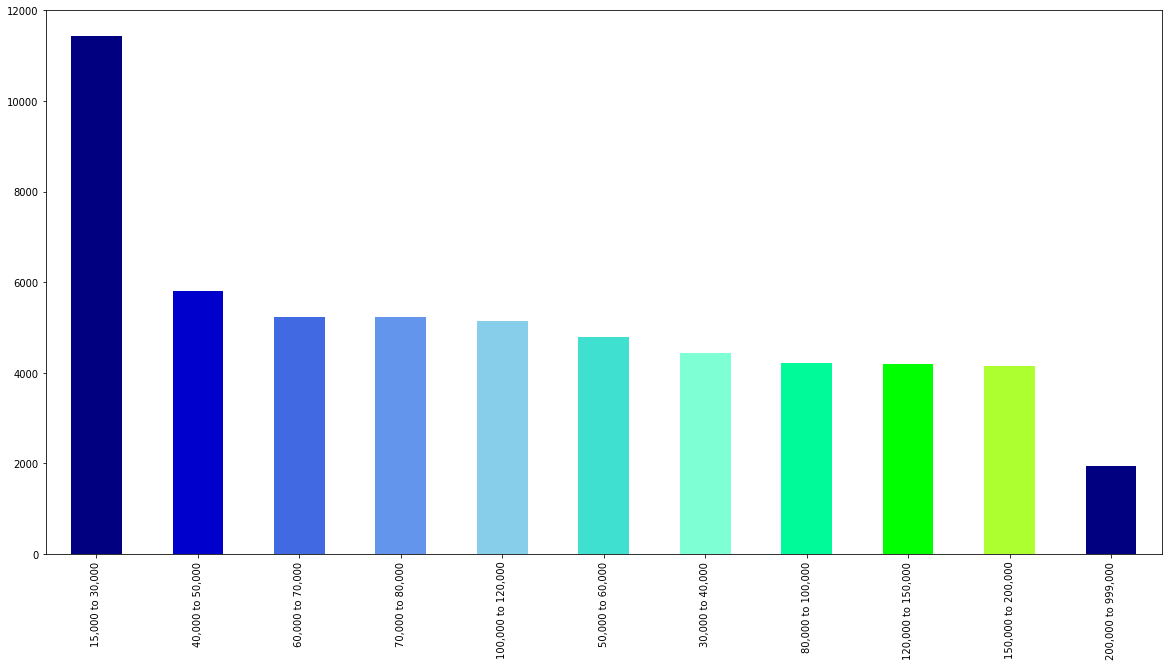

In [29]:
for_plot = df.loc[df['Location'] == 'Melbourne', 'SalaryRange'].value_counts()
for_plot.plot.bar(figsize=(20,10), color=my_colours)

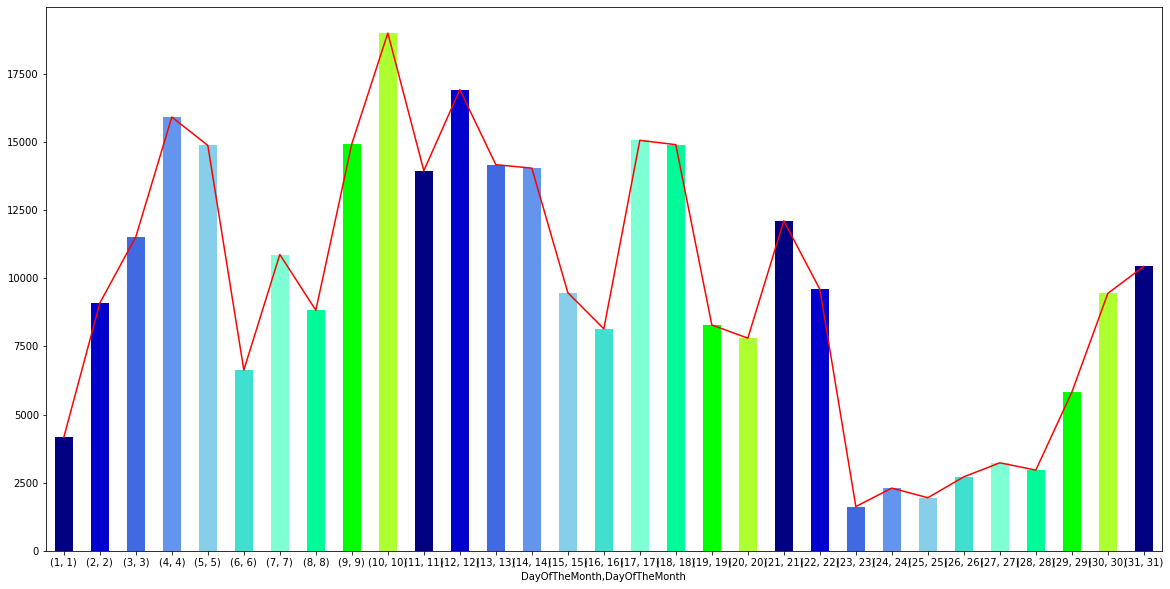

In [30]:
# Plot for showing the days of the month ads are posted on
df['DayOfTheMonth'] = pd.DatetimeIndex(df['Date']).day
for_plot = df.groupby('DayOfTheMonth')['DayOfTheMonth'].value_counts()
for_plot.plot.bar(figsize=(20,10), color=my_colours)
for_plot.plot(figsize=(20,10), color= 'red')

In [31]:
# info and plot for the sectors
for_plot = df['Classification'].value_counts()
print(for_plot)

Information & Communication Technology    34108
Trades & Services                         26665
Healthcare & Medical                      23631
Administration & Office Support           22704
Manufacturing, Transport & Logistics      22155
Hospitality & Tourism                     20923
Retail & Consumer Products                19468
Sales                                     14721
Accounting                                14544
Education & Training                      11692
Construction                              11534
Government & Defence                      10257
Mining, Resources & Energy                 8937
Engineering                                8828
Human Resources & Recruitment              6059
Community Services & Development           5834
Marketing & Communications                 5806
Banking & Financial Services               5491
Legal                                      5346
Call Centre & Customer Service             5287
Real Estate & Property                  

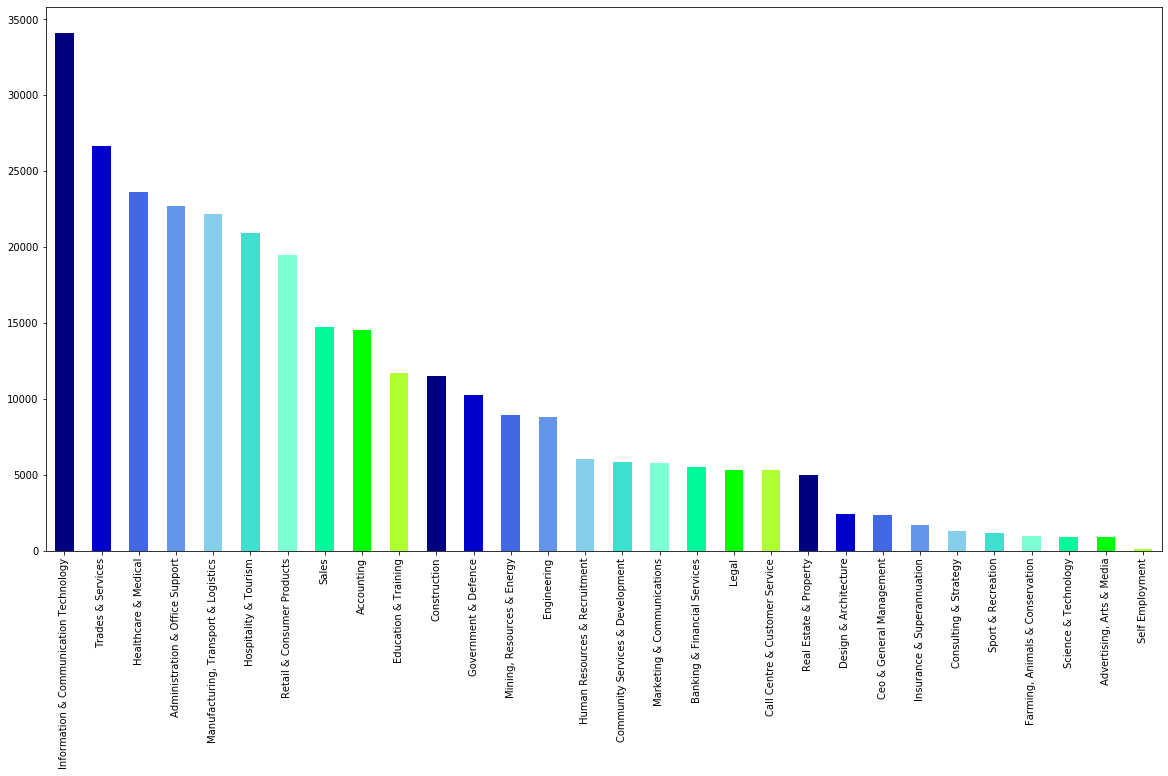

In [32]:
for_plot.plot.bar(figsize=(20,10), color=my_colours)

In [33]:
# info an plot for the sub-sectors
for_plot = df['SubClassification'].value_counts().head(30)
print(for_plot)

Other                                     14616
Administrative Assistants                 13534
Retail Assistants                         13162
Management                                11752
Chefs/Cooks                                7436
Road Transport                             7136
Developers/Programmers                     6131
Sales Representatives/Consultants          5760
Automotive Trades                          5570
Project Management                         5565
Warehousing, Storage & Distribution        5225
Business/Systems Analysts                  4903
Foreperson/Supervisors                     4578
Nursing - Aged Care                        4269
Government - State                         3805
Programme & Project Management             3624
Management - Store                         3564
Bar & Beverage Staff                       3478
Receptionists                              3436
Waiting Staff                              3378
New Business Development                

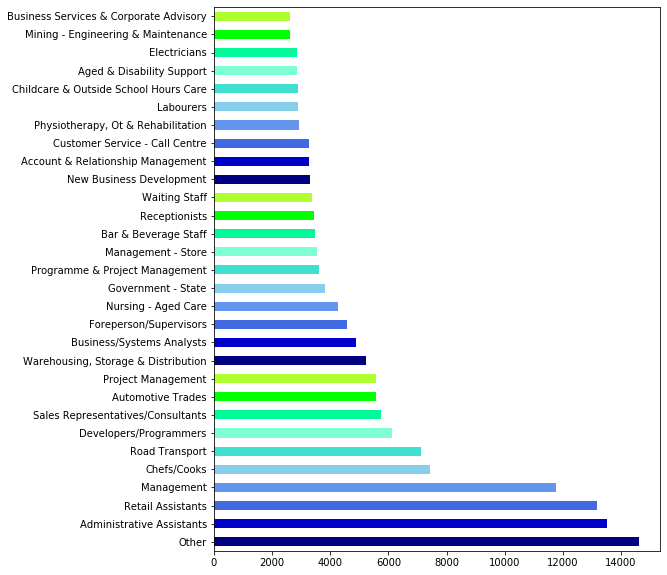

In [34]:
for_plot.plot.barh(figsize=(8,10), color=my_colours)

In [35]:
# For each Classification what is the most popular SubClassification and value for each
tempA = df.groupby(['Classification', 'SubClassification']).count()['Id'].reset_index()
tempA = tempA.groupby(['Classification']).max()
tempA = tempA.groupby(['Classification']).agg({'Id': 'max'})

array = []
percen = []
prop = df.groupby('Classification').count()
for a in tempA.index:
    maxValue = df[df['Classification'] == a]
    maxValue = maxValue.groupby('SubClassification').count()
    maxValue = maxValue.sort_values(by=['Id'], ascending=False)['Id']
    array.append(maxValue.index[0])
    
    propvalue = prop[prop.index == a]['Id']
    percen.append((maxValue[0] / propvalue[0]) * 100)
tempA = tempA.assign(SubClassification = array)
tempA = tempA.assign(Percentage = percen)
display(tempA)

,Id,SubClassification,Percentage
Classification,,,
Accounting,2628,Business Services & Corporate Advisory,18.069307
Administration & Office Support,13463,Administrative Assistants,59.297921
"Advertising, Arts & Media",152,Agency Account Management,16.945373
Banking & Financial Services,973,Compliance & Risk,17.719905
Call Centre & Customer Service,3251,Customer Service - Call Centre,61.490448
Ceo & General Management,1185,Management,50.468484
Community Services & Development,2796,Aged & Disability Support,47.925951
Construction,2711,Foreperson/Supervisors,23.504422
Consulting & Strategy,355,Management & Change Consulting,27.930763


In [36]:
#tempA.to_csv('tempA.csv')

Classification with average highest HighestSalary Classification
Ceo & General Management                  285.439523
Information & Communication Technology    238.446435
Consulting & Strategy                     206.744296
Healthcare & Medical                      155.922136
Construction                              150.807265
Legal                                     150.542462
Mining, Resources & Energy                148.544702
Engineering                               146.969869
Banking & Financial Services              138.402659
Science & Technology                      124.682900
Name: HighestSalary, dtype: float64

Classifications with average lowest HighestSalary Classification
Hospitality & Tourism                   47.994312
Call Centre & Customer Service          55.794591
Retail & Consumer Products              58.411599
Administration & Office Support         63.502863
Trades & Services                       65.528183
Community Services & Development        67.127357
Far

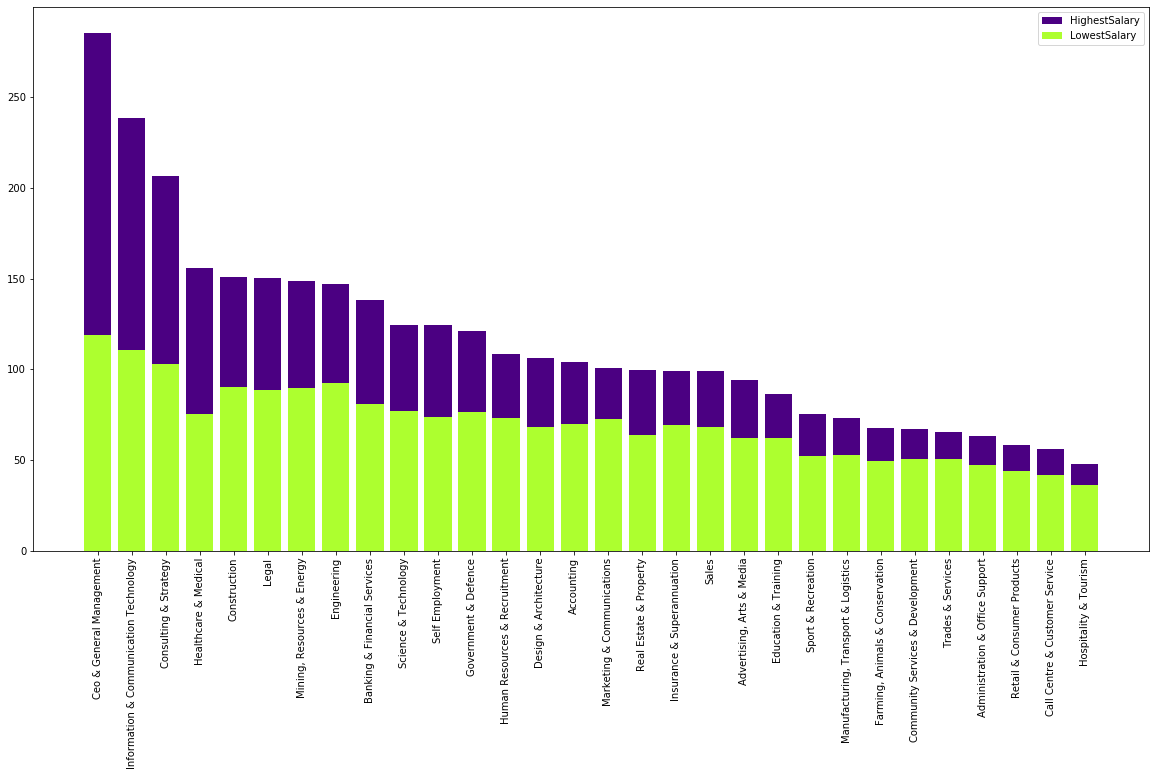

In [37]:
# This is to find the sector with the highest and lowest HigestSalary and the highest and lowest LowestSalary
# as well as the range of salaries for each sector
srangesec = df.groupby(['Classification']).agg({'LowestSalary': 'mean', 'HighestSalary': 'mean'})
plt.figure(figsize=(20, 10))
srangesec = srangesec.sort_values(by=['HighestSalary'], ascending=False)
plt.bar(srangesec.index, srangesec['HighestSalary'], label="HighestSalary", color='indigo')
plt.bar(srangesec.index, srangesec['LowestSalary'], label="LowestSalary", color='greenyellow')
plt.legend()
plt.tick_params(axis='x', rotation=90)

#plt.title("Average Highest and Lowest salary for each classification")
print("Classification with average highest HighestSalary", srangesec['HighestSalary'][0:10])
print('')
print("Classifications with average lowest HighestSalary", srangesec.sort_values(by=['HighestSalary'], ascending=True)['HighestSalary'][0:10], '\n')
print('')
print("Classifications with average highest LowestSalary", srangesec.sort_values(by=['LowestSalary'], ascending=False)['LowestSalary'][0:10])
print('')
print("Classifications with average lowest LowestSalary", srangesec.sort_values(by=['LowestSalary'], ascending=True)['LowestSalary'][0:10], '\n')

Classifications with the greatest salary range Classification
Ceo & General Management                  2.405686
Information & Communication Technology    2.153364
Healthcare & Medical                      2.069899
Consulting & Strategy                     2.008269
Banking & Financial Services              1.710294
Legal                                     1.702002
Self Employment                           1.688332
Construction                              1.672157
Mining, Resources & Energy                1.654797
Science & Technology                      1.614335
Engineering                               1.585446
Government & Defence                      1.585276
Real Estate & Property                    1.572392
Design & Architecture                     1.562600
Advertising, Arts & Media                 1.520226
Accounting                                1.493310
Human Resources & Recruitment             1.481374
Sales                                     1.447370
Sport & Recreation  

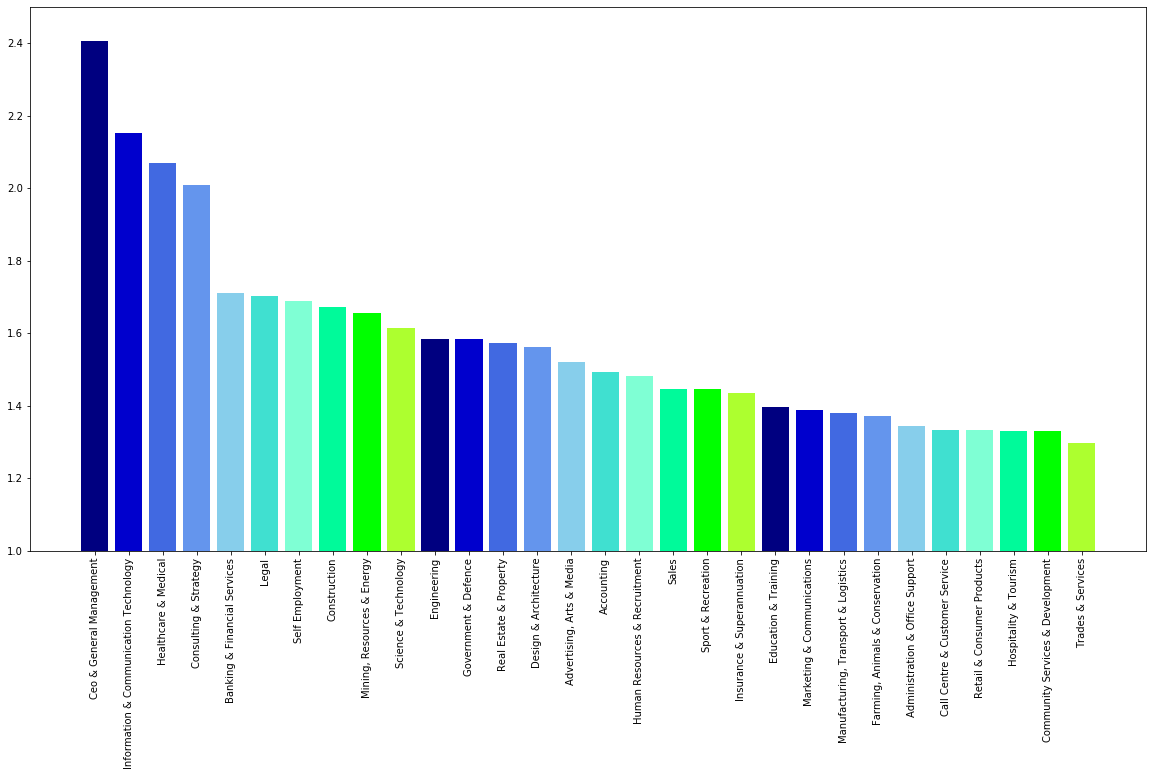

In [38]:
# Showing Salary range for each sector graph by percentage
srangesec = srangesec.assign(SalaryRange = srangesec['HighestSalary'] / srangesec['LowestSalary'])
plt.figure(figsize=(20, 10))
srangesec = srangesec.sort_values(by=['SalaryRange'], ascending=False)
plt.bar(srangesec.index, srangesec['SalaryRange'], color=my_colours)
plt.tick_params(axis='x', rotation=90)
#plt.title("Average difference between lowest and highest salary for each classification")
plt.ylim((1.0,2.5))
print("Classifications with the greatest salary range", srangesec['SalaryRange'][0:30])
print('')
print("Classifications with the lowest salary range", srangesec.sort_values(by=['SalaryRange'], ascending=True)['SalaryRange'][0:30], '\n')

In [39]:
# Salary range for each sub-sector
srangesub = df.groupby(['SubClassification']).agg({'LowestSalary': 'mean', 'HighestSalary': 'mean'})
print("SubClassification with average highest HighestSalary", srangesub.sort_values(by=['HighestSalary'], ascending=False)['HighestSalary'][0:50])
print('')
print("SubClassification with average lowest HighestSalary", srangesub.sort_values(by=['HighestSalary'], ascending=True)['HighestSalary'][0:50], '\n')
print('')
print("SubClassification with average highest LowestSalary", srangesub.sort_values(by=['LowestSalary'], ascending=False)['LowestSalary'][0:50])
print('')
print("SubClassification with average lowest LowestSalary", srangesub.sort_values(by=['LowestSalary'], ascending=True)['LowestSalary'][0:50], '\n')

SubClassification with average highest HighestSalary SubClassification
General Practitioners                     644.384916
Medical Specialists                       579.874299
Coo & Md                                  521.084746
Police & Corrections                      472.000000
Architects                                385.381543
General/Business Unit Manager             360.773140
Ceo                                       354.900227
Programme & Project Management            325.097682
Corporate Finance & Investment Banking    301.674419
Oil & Gas - Drilling                      300.093750
Consultants                               289.464869
Management & Change Consulting            285.614958
Oil & Gas - Engineering & Maintenance     282.076923
Security                                  269.147936
Performing Arts                           266.518987
Residents & Registrars                    266.384375
Company Secretaries                       262.357143
Business/Systems Analysts   

In [40]:
# Show Salary range for each sub-sector 
srangesub = srangesub.assign(SalaryRange = srangesub['HighestSalary'] / srangesub['LowestSalary'])


print("SubClassifications with the greatest salary range", srangesub.sort_values(by=['SalaryRange'], ascending=False)['SalaryRange'][0:5])
print('')
print("SubClassificaitons with the lowest salary range", srangesub.sort_values(by=['SalaryRange'], ascending=True)['SalaryRange'][0:5], '\n')

SubClassifications with the greatest salary range SubClassification
General Practitioners    4.175532
Police & Corrections     4.014713
Medical Specialists      3.853431
Coo & Md                 3.511593
Army                     2.997619
Name: SalaryRange, dtype: float64

SubClassificaitons with the lowest salary range SubClassification
Landscape Architecture      1.227603
Legal Secretaries           1.229965
Supervisors/Team Leaders    1.230041
Event Management            1.230533
Fund Administration         1.230769
Name: SalaryRange, dtype: float64 



In [41]:
# For trending, show classifications / subclassifications that are found the most together
trend = df.groupby(['Classification', 'SubClassification']).count()['Id'].reset_index()
trend = trend.sort_values(by=['Id'], ascending=False)
trend = trend.assign(CombinedClassification = trend['Classification'] + ' (' + trend['SubClassification'] + ')')
trend.index = trend['CombinedClassification']
print("Classifications & SubClassifications combinations with the most jobs", trend['Id'][0:10], '\n')

Classifications & SubClassifications combinations with the most jobs CombinedClassification
Administration & Office Support (Administrative Assistants)                   13463
Retail & Consumer Products (Retail Assistants)                                13145
Hospitality & Tourism (Chefs/Cooks)                                            7436
Manufacturing, Transport & Logistics (Road Transport)                          7136
Information & Communication Technology (Developers/Programmers)                6130
Sales (Sales Representatives/Consultants)                                      5760
Trades & Services (Automotive Trades)                                          5561
Manufacturing, Transport & Logistics (Warehousing, Storage & Distribution)     5225
Information & Communication Technology (Business/Systems Analysts)             4897
Healthcare & Medical (Nursing - Aged Care)                                     4269
Name: Id, dtype: int64 



In [42]:
# For trending, show classifications that are the most
trend = df.groupby(['Classification']).count()['Id'].reset_index()
trend = trend.sort_values(by=['Id'], ascending=False)
trend = trend.assign(CombinedClassification = trend['Classification'])
trend.index = trend['CombinedClassification']
print("Classifications with the most jobs", trend['Id'][0:10], '\n')

Classifications with the most jobs CombinedClassification
Information & Communication Technology    34108
Trades & Services                         26665
Healthcare & Medical                      23631
Administration & Office Support           22704
Manufacturing, Transport & Logistics      22155
Hospitality & Tourism                     20923
Retail & Consumer Products                19468
Sales                                     14721
Accounting                                14544
Education & Training                      11692
Name: Id, dtype: int64 



In [43]:
# For trending, show subclassifications that are the most
trend = df.groupby(['SubClassification']).count()['Id'].reset_index()
trend = trend.sort_values(by=['Id'], ascending=False)
trend = trend.assign(CombinedClassification = trend['SubClassification'])
trend.index = trend['CombinedClassification']
print("SubClassifications with the most jobs", trend['Id'][0:10], '\n')

SubClassifications with the most jobs CombinedClassification
Other                                14616
Administrative Assistants            13534
Retail Assistants                    13162
Management                           11752
Chefs/Cooks                           7436
Road Transport                        7136
Developers/Programmers                6131
Sales Representatives/Consultants     5760
Automotive Trades                     5570
Project Management                    5565
Name: Id, dtype: int64 



In [44]:
# Stop word list to take out of skills etc
stops = list(stopwords.words('english'))

In [45]:
print(stops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [46]:
# Initial idea to find all words less stop words and occurences of these words
fd = Counter(" ".join(df["FullDescription"]).split()).most_common(500000)
fd_df = pd.DataFrame(fd, columns=['Word','Count'])
fd_df.sort_values(by=['Count'], ascending=False)
fd_df.reset_index(drop=True)
fd_df['Word'] = fd_df['Word'].str.lower()
fd_df = fd_df[~fd_df['Word'].isin(stops)]
fd_df['Word'] = fd_df['Word'].str.title()
fd_df.to_csv('fd_skills.csv')
fd_df.head(100)

,Word,Count
15,Experience,540776
20,Work,471350
24,&Nbsp;,378956
25,Team,377959
26,Role,371854
...,...,...
138,Reporting,67373
139,–,67155
140,Offer,66764
141,Australia,66331


In [47]:
# Second idea, to find all the adjectives out of the previous list, to ensure they are skill words
import textblob
from textblob import TextBlob
def get_adjectives(text):
    blob = TextBlob(text)
    return [ word for (word,tag) in blob.tags if tag == "JJ"]

In [48]:
# ** PLEASE NOTE **
# This takes a very lonng time to run on the dataset, so we have commented it out

#fd_df['Adjectives'] = fd_df['Word'].apply(get_adjectives)
#fd_df.to_csv('fd_skills.csv')
#fd_df.head(100)

In [49]:
# Initial idea to find all words less stop words and occurences of these words
e = Counter(" ".join(df["Requirement"]).split()).most_common(500000)
e_df = pd.DataFrame(e, columns=['Word','Count'])
e_df.sort_values(by=['Count'], ascending=False)
e_df.reset_index(drop=True)
e_df['Word'] = e_df['Word'].str.lower()
e_df = e_df[~e_df['Word'].isin(stops)]
e_df['Word'] = e_df['Word'].str.title()
e_df.to_csv('r_skills.csv')
e_df.head(100)

,Word,Count
7,Join,70511
13,Opportunity,47733
14,Seeking,46408
15,Team,44084
16,Experienced,38751
...,...,...
124,Busy,5214
126,Government,5005
127,National,4873
128,Quality,4747


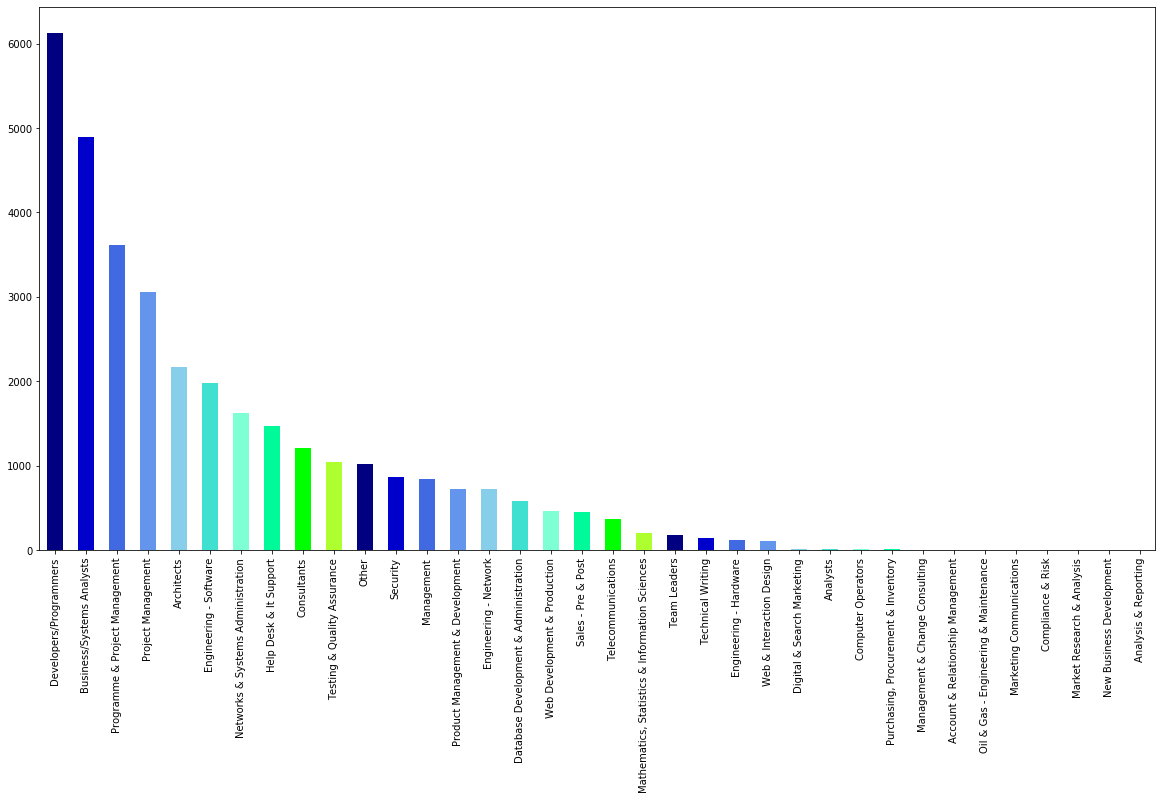

In [50]:
# The below code is all possibly repetitive, but for Case Study 1
# ** Start of case study one **
for_plot = df.loc[df['Classification'] == 'Information & Communication Technology', 'SubClassification'].value_counts()
for_plot.plot.bar(figsize=(20,10), color=my_colours)

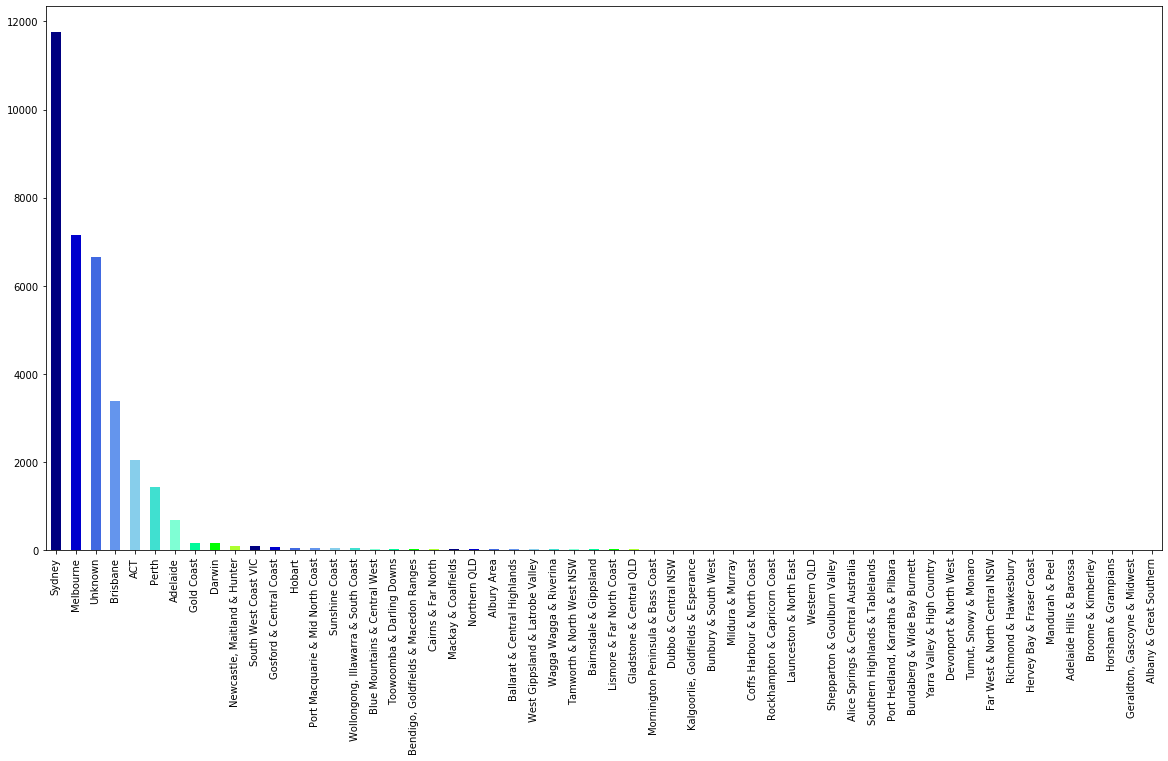

In [51]:
for_plot = df.loc[df['Classification'] == 'Information & Communication Technology', 'Location'].value_counts()
for_plot.plot.bar(figsize=(20,10), color=my_colours)

In [52]:
dev_pro = df.loc[df['SubClassification'] == 'Developers/Programmers', 'Location'].value_counts().sort_index()

dev_pro_df = pd.DataFrame(dev_pro)
dev_pro_df = dev_pro_df.rename_axis('Location')

dev_pro_df.columns = ['Count']
print(dev_pro_df)

                                      Count
Location                                   
ACT                                     281
Adelaide                                101
Albury Area                               1
Ballarat & Central Highlands              2
Bendigo, Goldfields & Macedon Ranges      2
Blue Mountains & Central West             5
Brisbane                                597
Cairns & Far North                        2
Darwin                                    8
Gladstone & Central QLD                   1
Gold Coast                               32
Gosford & Central Coast                   5
Hervey Bay & Fraser Coast                 1
Hobart                                   13
Launceston & North East                   1
Lismore & Far North Coast                 1
Melbourne                              1541
Mornington Peninsula & Bass Coast         1
Newcastle, Maitland & Hunter             10
Perth                                   273
South West Coast VIC            

In [53]:
bus_sys = df.loc[df['SubClassification'] == 'Business/Systems Analysts', 'Location'].value_counts().sort_index()

bus_sys_df = pd.DataFrame(bus_sys)
bus_sys_df = bus_sys_df.rename_axis('Location')

bus_sys_df.columns = ['Count']
print(bus_sys_df)

                                      Count
Location                                   
ACT                                     238
Adelaide                                 98
Albury Area                               2
Bendigo, Goldfields & Macedon Ranges      2
Blue Mountains & Central West             3
Brisbane                                480
Cairns & Far North                        3
Coffs Harbour & North Coast               1
Darwin                                   35
Dubbo & Central NSW                       2
Far West & North Central NSW              1
Gold Coast                               15
Gosford & Central Coast                  17
Hobart                                    3
Lismore & Far North Coast                 2
Mackay & Coalfields                       1
Melbourne                               763
Mildura & Murray                          1
Newcastle, Maitland & Hunter             10
Northern QLD                              3
Perth                           

In [54]:
pro_pro = df.loc[df['SubClassification'] == 'Programme & Project Management', 'Location'].value_counts().sort_index()

pro_pro_df = pd.DataFrame(pro_pro)
pro_pro_df = pro_pro_df.rename_axis('Location')

pro_pro_df.columns = ['Count']
print(pro_pro_df)

                                     Count
Location                                  
ACT                                    249
Adelaide                                62
Albany & Great Southern                  1
Alice Springs & Central Australia        1
Bairnsdale & Gippsland                   1
Ballarat & Central Highlands             1
Blue Mountains & Central West            2
Brisbane                               436
Bunbury & South West                     2
Cairns & Far North                       4
Darwin                                  16
Geraldton, Gascoyne & Midwest            1
Gold Coast                              11
Gosford & Central Coast                  7
Hobart                                   9
Mackay & Coalfields                      1
Melbourne                              613
Newcastle, Maitland & Hunter             8
Perth                                  129
Port Macquarie & Mid North Coast        16
Rockhampton & Capricorn Coast            2
South West 

In [55]:
for_plot_df = pd.merge(pd.merge(dev_pro_df,bus_sys_df, on = 'Location',how='left'),pro_pro_df,on='Location',how='left')
#for_plot_df = for_plot_df.reindex(sorter)
for_plot_df.columns = ['Developers/Programmers', 'Business/Systems Analysts', 'Programme & Project Management']
print(for_plot_df)

                                      Developers/Programmers  \
Location                                                       
ACT                                                      281   
Adelaide                                                 101   
Albury Area                                                1   
Ballarat & Central Highlands                               2   
Bendigo, Goldfields & Macedon Ranges                       2   
Blue Mountains & Central West                              5   
Brisbane                                                 597   
Cairns & Far North                                         2   
Darwin                                                     8   
Gladstone & Central QLD                                    1   
Gold Coast                                                32   
Gosford & Central Coast                                    5   
Hervey Bay & Fraser Coast                                  1   
Hobart                                  

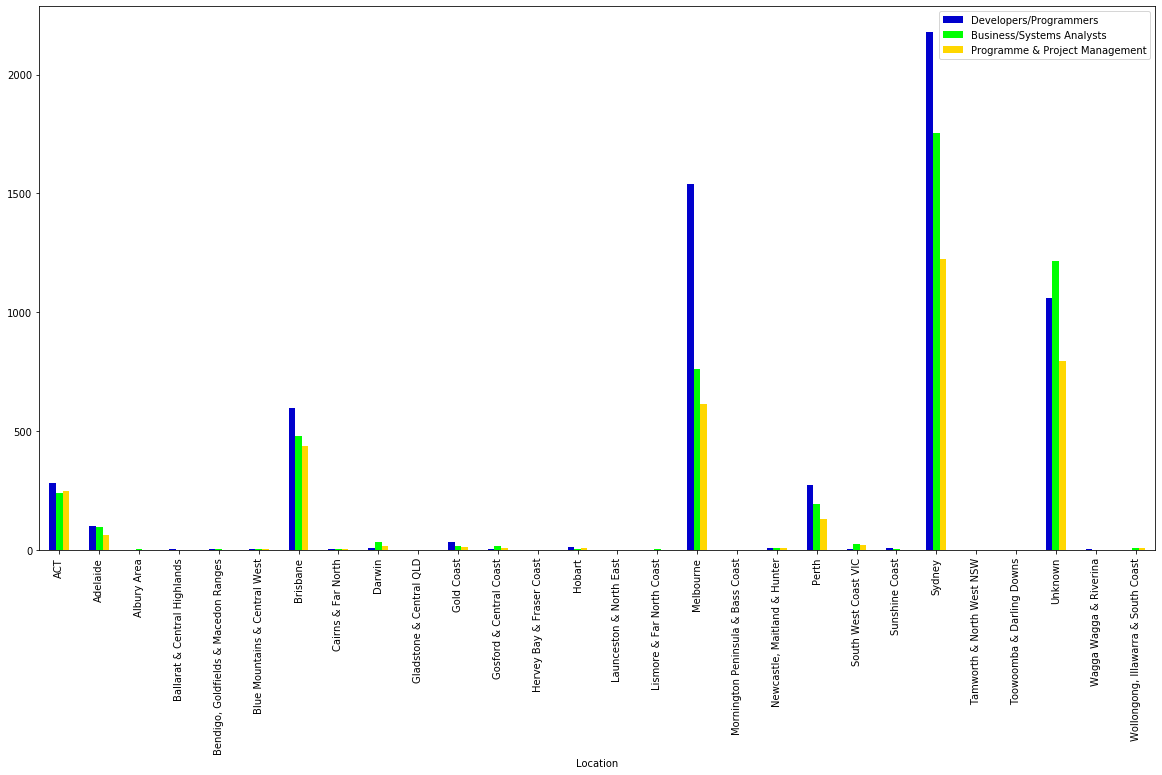

In [56]:
three_colours = ['mediumblue', 'lime', 'gold']
#pie_colours = ['navy', 'mediumblue', 'royalblue', 'cornflowerblue', 'skyblue', 'turquoise', 'mediumspringgreen',
#               'lime', 'greenyellow', 'yellow', 'gold']
for_plot_df.plot.bar(figsize=(20,10), color=three_colours)

In [57]:
# ** End of case study one **

In [58]:
# Skill getting - This uses our final idea, to get all words before the words skill or skills for the skill list.

def search(group, inputvalues, inputdata):
    matchdata = pd.DataFrame()
    for sec in group.index:
        for value in inputvalues:
            if value.lower() in sec.lower():
                print(value, sec)
                if (inputdata == 0):
                    temp = df[df.Area == sec]
                elif (inputdata == 1):
                    temp = areadata[areadata.Classification == sec]
                elif (inputdata == 2):
                    temp = sectordata[sectordata.Location == sec]
                elif (inputdata == 3):
                    temp = locationdata[locationdata.SubClassification == sec]
                matchdata = matchdata.append(temp, ignore_index=True)
                break
    return matchdata

# We are able to refine our search to sector, sub-sector, location and area
sectors = "Information & Communication Technology"
subsectors = "Developers/Programmers, Business/Systems Analysts, Programme & Project Management"
locations = "Sydney, Melbourne, Brisbane"
areas = ""


sectors = sectors.split(',')
for a in range(0, len(sectors)):
    sectors[a] = sectors[a].strip()
subsectors = subsectors.split(',')
for a in range(0, len(subsectors)):
    subsectors[a] = subsectors[a].strip()
locations = locations.split(',')
for a in range(0, len(locations)):
    locations[a] = locations[a].strip()
areas = areas.split(',')
for a in range(0, len(areas)):
    areas[a] = areas[a].strip()
print(sectors)
print(subsectors)
print(locations)
print(areas)

allareas = df.groupby('Area').count()
areadata = search(allareas, areas, 0)
print("\n")

allsectors = areadata.groupby('Classification').count()
sectordata = search(allsectors, sectors, 1)
print("\n")

alllocations = sectordata.groupby('Location').count()
locationdata = search(alllocations, locations, 2)
print("\n")

allsubsectors = locationdata.groupby('SubClassification').count()
output = search(allsubsectors, subsectors, 3)
print("\n")
print(output.shape)

d = dict()
for i, row in output.iterrows():
    fd = row["FullDescription"].lower().split()
    for word in fd:
        word = word.strip()
        if (word == 'skill' or word == 'skills'):
            if previous in d:
                d[previous] += 1
            else:
                d[previous] = 1
        previous = word
#d = sorted(d.items(), key = lambda kv: kv[1], reverse=True)

stops = list(stopwords.words('english'))

banned = ['#', '*', '@', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '!', '$', 'Ã', '©', '€', ' â', '“',
         '-', '%', '^', '&', '(', ')', '?', ';', ':', '/']

full_des = dict([(key, val) for key, val in d.items() if key not in stops])

full_des = dict([(key, val) for key, val in d.items() if key not in banned])

#print(full_des)

d2 = dict()
for i, row in output.iterrows():
    fd = row["Requirement"].lower().split()
    for word in fd:
        word = word.strip()
        if (word == 'skill' or word == 'skills'):
            if previous in d2:
                d2[previous] += 1
            else:
                d2[previous] = 1
        previous = word
#d2 = sorted(d.items(), key = lambda kv: kv[1], reverse=True)

req = dict([(key, val) for key, val in d2.items() if key not in stops])

req = dict([(key, val) for key, val in d2.items() if key not in banned])

#print(req)

res2 = dict()

for k, v in full_des.items():
    if v >= 10:
        if k not in stops:
            if k not in banned:
                res2[k] = +v

for k, v in req.items():
    if v >= 10:
        if k not in stops:
            if k not in banned:
                res2[k] = +v

res2 = sorted(res2.items(), key = lambda kv: kv[1], reverse=True)

print(res2)

['Information & Communication Technology']
['Developers/Programmers', 'Business/Systems Analysts', 'Programme & Project Management']
['Sydney', 'Melbourne', 'Brisbane']
['']
 Bayside & Eastern Suburbs
 Bayside & South Eastern Suburbs
 CBD & Inner Suburbs
 CBD, Inner & Western Suburbs
 CBD, Inner West & Eastern Suburbs
 Eastern Suburbs
 Fremantle & Southern Suburbs
 North Shore & Northern Beaches
 North West & Hills District
 Northern Suburbs
 Northern Suburbs & Joondalup
 Parramatta & Western Suburbs
 Rockingham & Kwinana
 Ryde & Macquarie Park
 South West & M5 Corridor
 Southern Suburbs & Logan
 Southern Suburbs & Sutherland Shire
 Unknown
 Western Suburbs
 Western Suburbs & Ipswich


Information & Communication Technology Information & Communication Technology


Brisbane Brisbane
Melbourne Melbourne
Sydney Sydney


Business/Systems Analysts Business/Systems Analysts
Developers/Programmers Developers/Programmers
Programme & Project Management Programme & Project Management


(9584, 17

In [59]:
# The below code is all possibly repetitive, but for Case Study 2
# ** Start of case study two **

In [60]:
# Could modify for multiple sector / subsectors
sectors = "Technology"
subsectors = "Developer"
locations = "Sydney"
areas = "CBD"
skills = "Python, CSS, Javascript"

sectors = sectors.split(',')
for a in range(0, len(sectors)):
    sectors[a] = sectors[a].strip()
subsectors = subsectors.split(',')
for a in range(0, len(subsectors)):
    subsectors[a] = subsectors[a].strip()
locations = locations.split(',')
for a in range(0, len(locations)):
    locations[a] = locations[a].strip()
areas = areas.split(',')
for a in range(0, len(areas)):
    areas[a] = areas[a].strip()
skills = skills.split(',')
for a in range(0, len(skills)):
    skills[a] = skills[a].strip()
print(sectors)
print(subsectors)
print(locations)
print(areas)
print(skills)

allareas = df.groupby('Area').count()
areadata = search(allareas, areas, 0)
print("\n")

allsectors = areadata.groupby('Classification').count()
sectordata = search(allsectors, sectors, 1)
print("\n")

alllocations = sectordata.groupby('Location').count()
locationdata = search(alllocations, locations, 2)
print("\n")

allsubsectors = locationdata.groupby('SubClassification').count()
output = search(allsubsectors, subsectors, 3)
print("\n")

output['MatchWeight'] = 0
for i, row in output.iterrows():
    fd = row["FullDescription"].lower()
    ti = row["Title"].lower()
    re = row["Requirement"].lower()
    fdlen = (len(fd.split()) + 1)
    tilen = (len(ti.split()) + 1)
    relen = (len(re.split()) + 1)
    weight = 0
    for skill in skills:
        weight += (fd.count(skill.lower()) / fdlen)
        weight += (ti.count(skill.lower()) / tilen)               
        weight += (re.count(skill.lower()) / relen)
    output.loc[i, "MatchWeight"] = weight
        
output = output.sort_values(by=['MatchWeight', 'HighestSalary', 'LowestSalary', 'Date'], ascending=False)[0:10]
display(output)
output.to_csv('jobmatch.csv', index = True, header=True)

['Technology']
['Developer']
['Sydney']
['CBD']
['Python', 'CSS', 'Javascript']
CBD CBD & Inner Suburbs
CBD CBD, Inner & Western Suburbs
CBD CBD, Inner West & Eastern Suburbs


Technology Information & Communication Technology
Technology Science & Technology


Sydney Sydney


Developer Developers/Programmers




,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,TitleCategory,AverageSalary,SalaryRange,DayOfTheMonth,MatchWeight
649,37574361,Pentester/Automation/Ios/Python,FIRESOFT Consulting,2018-10-28,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Developers/Programmers,Private Software Development Company Located I...,About\n The Client Specialises In Cross...,150,200,Full Time,Pentester/Automation/Ios/Python,175,"150,000 to 200,000",28,0.562648
937,37939041,Senior Python Engineer,Epam Systems (Australia) PTY LTD,2018-12-16,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Developers/Programmers,Web Applications Developer With Python And Fro...,Web Applications Developer With Python And Fro...,15,30,Full Time,Senior Python Engineer,15,"15,000 to 30,000",16,0.431818
862,37609518,Python Engineer,Robert Walters,2018-11-01,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Developers/Programmers,Python Engineer To Join An Innovative Team In ...,Python Engineer To Join An Innovative Team In ...,150,200,Contract/Temp,Python Engineer,175,"150,000 to 200,000",1,0.421609
597,37595002,Senior Javascript Developer,Chandler Macleod Group,2018-10-30,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Developers/Programmers,Good Opportunity For A Javascript Developer,One Of Our Government Clients Is Looking For A...,120,150,Contract/Temp,Senior Javascript Developer,135,"120,000 to 150,000",30,0.413127
786,37646257,Senior Front End Developer (Html5/Css3/Javascr...,Fairfax Media Pty Ltd,2018-11-06,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Developers/Programmers,Permanent Role. Build Web Applications For Our...,\n \n Re-Invent Publishing\n ...,120,150,Full Time,Front End Developer,135,"120,000 to 150,000",6,0.398674
707,37656044,Python Developer,Robert Walters,2018-11-07,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Developers/Programmers,Insurance Tech Start Up Looking For The Additi...,There Is One Mid-Level And One Senior Python D...,15,30,Full Time,Python Developer,15,"15,000 to 30,000",7,0.398543
374,37468934,Javascript Developer,Oakton Contracting & Recruitment Pty Ltd,2018-10-15,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Developers/Programmers,Javascript Developer (Contract Or Permanent) R...,Work Type: Contract Or Permanent&Nbsp;Vacancy ...,150,200,Full Time,Javascript Developer,175,"150,000 to 200,000",15,0.392709
302,37481671,Javascript Developer,Event Hub,2018-10-17,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Developers/Programmers,Looking For A Javascript Developer To Join A P...,About The Business Event Hub Is A Young Austr...,80,100,Full Time,Javascript Developer,90,"80,000 to 100,000",17,0.388423
721,37652745,Python/Django Middleware Developer Devops - Te...,Big Wave Digital,2018-11-07,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Developers/Programmers,Middleware Development\nWell-Structured Code\n...,Python/Django Middleware Developer Devops – Te...,15,30,Full Time,Senior Developer,15,"15,000 to 30,000",7,0.372222
147,37430625,Python Developer,S2P,2018-10-10,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Developers/Programmers,"My Client Is A Leading Business Intelligence, ...",Python Developer &Nbsp; My Client Are A Market...,15,30,Full Time,Python Developer,15,"15,000 to 30,000",10,0.357809


In [61]:
# ** End of case study two **

In [62]:
#df.to_csv('output.csv')